<a href="https://colab.research.google.com/github/peenalGupta/Data-Analytics-3-Labs/blob/main/03_FashionMNIST_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Challenge: Get the best results on the [fashion-MNIST](https://github.com/zalandoresearch/fashion-mnist) dataset!

> "Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. We intend Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits."

<img src="https://raw.githubusercontent.com/zalandoresearch/fashion-mnist/master/doc/img/fashion-mnist-sprite.png">


TASK - Challenge: Get the best results on the fashionMNIST dataset!

The challenge of this task is to get the best results on the fashionMNIST dataset by tuning hyperparameters of the model and observing convergence behavior.

"Best" - for simplicity - means the highest accuracy on the validation set.

"Rules":

    You can change any hyperparameters,
    including the number of layers,
    width of the layers,
    activation functions,
    regularizers (and their parameters),
    optimizer (and it's parameters), but
    you should not change the model architecture, use only fully connected layers! (Even if you know any others... :-P

Added constraint: The model with the "best performance" has to be saved, so it should not be just a printout happening once during training!

And: You may NOT manipulate the validation set! :-P

Happy coding! :-)


# Loading the data

In [26]:
import tensorflow as tf

(train_images, train_labels), (valid_test_images, valid_test_labels) = tf.keras.datasets.fashion_mnist.load_data()

# because of some limitations of Keras's softmax implementation, it's
# advisable to normalise the images by dividing the intensities by the
# maximal 255 value
train_images = train_images / 255.

valid_test_images = valid_test_images / 255. # the same normalization for valid and test

valid_images = valid_test_images[:5000]
valid_labels = valid_test_labels[:5000]
test_images = valid_test_images[5000:]
test_labels = valid_test_labels[5000:]

print(train_images.shape, valid_images.shape, test_images.shape)

(60000, 28, 28) (5000, 28, 28) (5000, 28, 28)


The classes are:
0.   T-shirt/top
1.   Trouser
2.	Pullover
3.	Dress
4.	Coat
5.	Sandal
6.	Shirt
7.	Sneaker
8.	Bag
9.	Ankle boot

In [27]:
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Let's have a look at the first few training images:

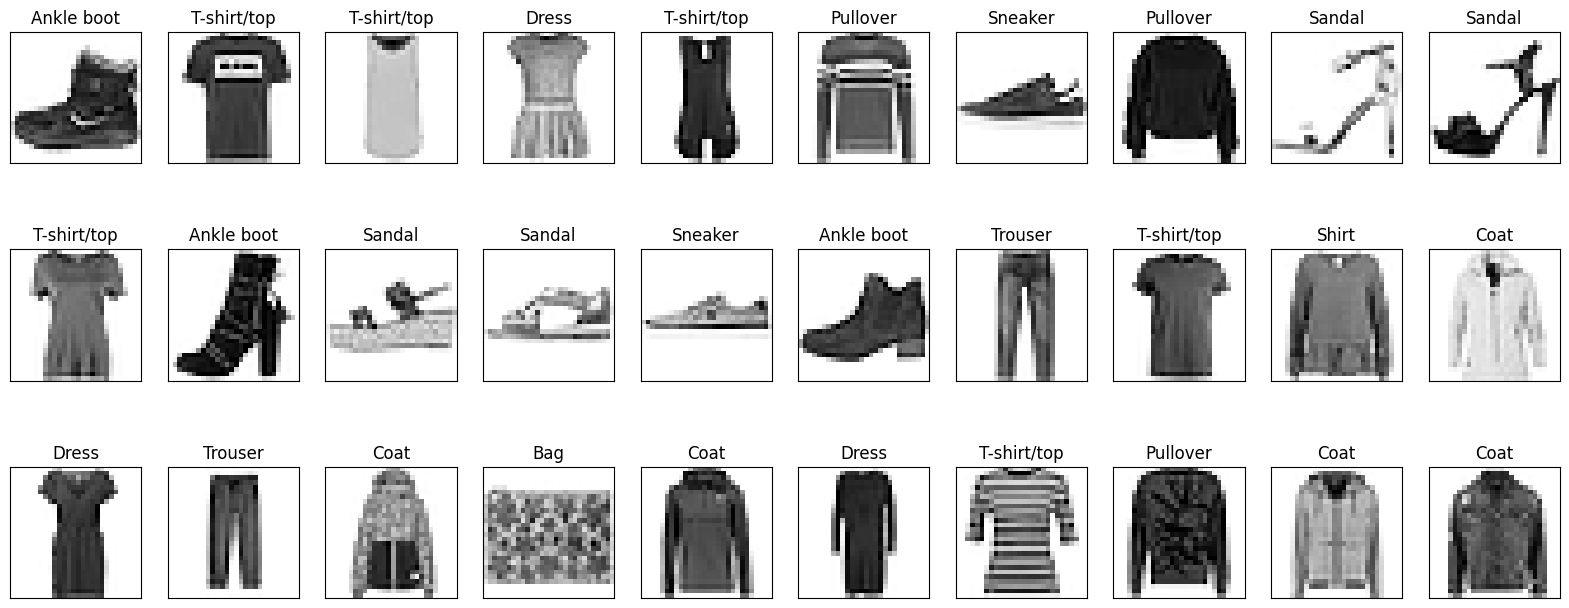

In [28]:
from matplotlib import pyplot as plt
from math import ceil

def show_images(images, labels):
    """Show images in a grid
    """
    # n_images = len(images)
    # print(n_images)
    n_rows = ceil(len(images) / 10)

    #print(n_rows)
    plt.figure(figsize=(20, 8))
    for i, image in enumerate(images):
        ax = plt.subplot(n_rows, 10, i + 1, xticks=[], yticks=[])
        # below we scale the pixel intensities back to display the images correctly
        plt.imshow(image, cmap='Greys')
        plt.title(classes[labels[i]])

show_images(train_images[:30], train_labels[:30])
plt.show();

Transform images with size of 28x28 to array of 784, so it can be used as input of the network

In [34]:
def reshape(images):
    images = images.reshape(images.shape[0], -1)
    return images

train_images = reshape(train_images)
valid_images = reshape(valid_images)
test_images = reshape(test_images)

print(train_images.shape, valid_images.shape, test_images.shape)

(60000, 784) (5000, 784) (5000, 784)


# Model

We set the random seeds to get (as far as possible) reproducible results:

In [35]:
# Fix seeds for (hopefully) reproducible results
from numpy.random import seed
import tensorflow as tf

seed(14)
tf.random.set_seed(19)

## Network

In [36]:
# Reshape data back to original dimensions
train_images = train_images.reshape(-1, 28, 28)
valid_images = valid_images.reshape(-1, 28, 28)
test_images = test_images.reshape(-1, 28, 28)

In [37]:
print(train_images.shape, valid_images.shape, test_images.shape)

(60000, 28, 28) (5000, 28, 28) (5000, 28, 28)


In [38]:
# TODO: Try different models with different number of hidden layer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

# Define a function to create the model with a specified number of hidden layers
def create_model(hidden_layers):
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28)))  # Automatically handles (28, 28) input
    model.add(Dense(128, activation='relu'))  # Input layer

    # Add hidden layers dynamically
    for _ in range(hidden_layers):
        model.add(Dense(64, activation='relu'))

    model.add(Dense(10, activation='softmax'))  # Output layer for 10 classes
    return model

In [20]:
# # Function to create a model with a given number of hidden layers
# import tensorflow as tf
# from tensorflow.keras.optimizers import Adadelta, Adam
# from tensorflow.keras.losses import sparse_categorical_crossentropy
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Flatten, Input
# def create_model(hidden_layers):
#   model = Sequential()
#   model.add(Input(shape=(28,28)))
#   model.add(Flatten())  # Input layer

#   # Add hidden layers
#   #for _ in range(hidden_layers):

#   #model.add(Dense(256, activation = 'relu'))
#   model.add(Dense(128, activation = 'relu'))
#   #model.add(Dense(64, activation = 'relu'))

#   # Output layer (10 classes for fashion_mnist)
#   model.add(Dense(10, activation='softmax'))


#   return model

## Loss, optimization and compilation

In [46]:
from tensorflow.keras.optimizers import Adadelta, Adam
from tensorflow.keras.losses import sparse_categorical_crossentropy

# Train and evaluate models with different numbers of hidden layers
#hidden_layer_configs = [1, 2, 3, 4, 5]
hidden_layer = 3
#for layers in hidden_layer_configs:
model = create_model(hidden_layer)
  # Loss
loss = sparse_categorical_crossentropy # we use this cross entropy variant as the input is not
                                       # one-hot encoded

  # Optimizer
optimizer = Adam() # A "smart" SGD variant

  # Compilation
  #############
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

model
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 117,706 (459.79 KB)

 Trainable params: 117,706 (459.79 KB)

 Non-trainable params: 0 (0.00 B)

## Training

In [47]:
# TODO: Train the model
# Train the model
from tensorflow.keras.callbacks import EarlyStopping
epochs = 20
batch_size = 32
history = model.fit(
    train_images, train_labels,
    validation_data=(valid_images, valid_labels),
    epochs=epochs,
    batch_size=batch_size
)

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7552 - loss: 0.6741 - val_accuracy: 0.8392 - val_loss: 0.4351
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8605 - loss: 0.3827 - val_accuracy: 0.8524 - val_loss: 0.3983
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8743 - loss: 0.3417 - val_accuracy: 0.8698 - val_loss: 0.3610
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8843 - loss: 0.3136 - val_accuracy: 0.8698 - val_loss: 0.3515
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8927 - loss: 0.2921 - val_accuracy: 0.8738 - val_loss: 0.3527
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8967 - loss: 0.2780 - val_accuracy: 0.8768 - val_loss: 0.3523
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9016 - loss: 0.2661 - val_accuracy: 0.8746 - val_loss: 0.3513
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9044 - loss: 0.2580

## Training Performance

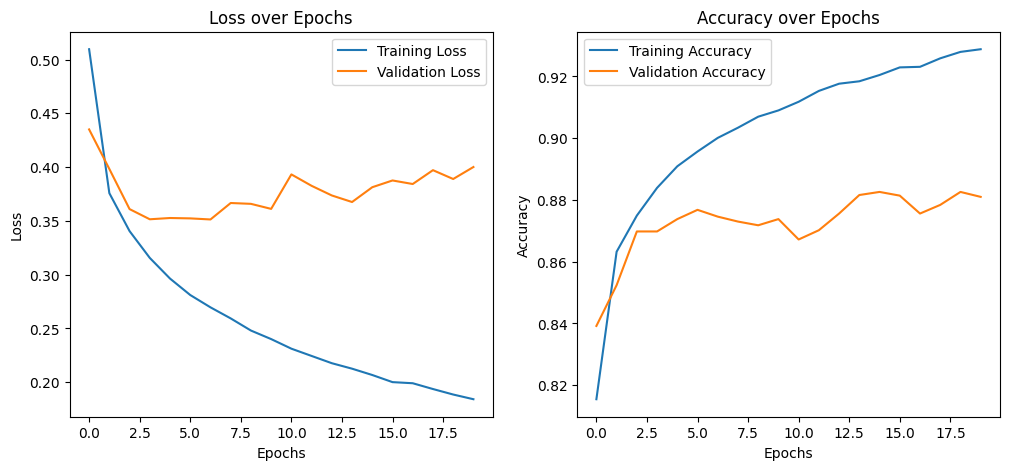

In [48]:
# TODO: Plot loss and accuracy
# Plot loss and accuracy
import matplotlib.pyplot as plt

def plot_training_performance(history):
    plt.figure(figsize=(12, 5))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

plot_training_performance(history)

## Quality Check

In [49]:
assert max(history.history['accuracy'])>0.72
assert max(history.history['val_accuracy'])>0.73

## Visualization

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


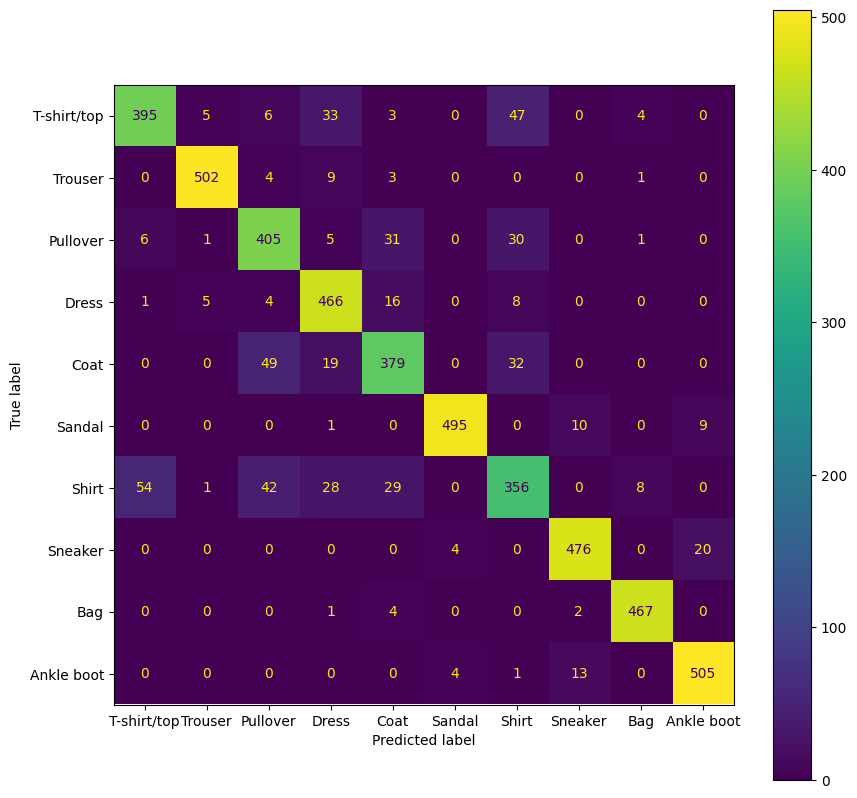

In [50]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict
predictions = model.predict(test_images)

# Create confusion matrix and normalizes it over predicted (columns)
cm = confusion_matrix(test_labels, predictions.argmax(axis=1))

# Plot
cmd = ConfusionMatrixDisplay(cm, display_labels=classes)
fig, ax = plt.subplots(figsize=(10,10))
cmd.plot(ax=ax)

In [51]:
from sklearn.metrics import classification_report

print(classification_report(test_labels, predictions.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.87      0.80      0.83       493
           1       0.98      0.97      0.97       519
           2       0.79      0.85      0.82       479
           3       0.83      0.93      0.88       500
           4       0.82      0.79      0.80       479
           5       0.98      0.96      0.97       515
           6       0.75      0.69      0.72       518
           7       0.95      0.95      0.95       500
           8       0.97      0.99      0.98       474
           9       0.95      0.97      0.96       523

    accuracy                           0.89      5000
   macro avg       0.89      0.89      0.89      5000
weighted avg       0.89      0.89      0.89      5000



## Saving the model

In [45]:
model.save('my_model.h5')  # creates a HDF5 file 'my_model.h5'